In [0]:
!pip install graphviz
!apt-get install graphviz
!pip install -q pydot

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
!apt-get autoremove

Reading package lists... Done
Building dependency tree       
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
print("*************** GPU info ***************")
!cat /proc/driver/nvidia/gpus/0000:00:04.0/information
print("*************** CPU info ***************")
!cat /proc/cpuinfo
print("*************** Memory info ***************")
!cat /proc/meminfo

*************** GPU info ***************
Model: 		 Tesla K80
IRQ:   		 37
GPU UUID: 	 GPU-62e453a6-1678-dc4f-b058-b1c2305eb68c
Video BIOS: 	 80.21.25.00.02
Bus Type: 	 PCI
DMA Size: 	 40 bits
DMA Mask: 	 0xffffffffff
Bus Location: 	 0000:00:04.0
Device Minor: 	 0
Blacklisted:	 No
*************** CPU info ***************
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibr

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from __future__ import division
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
import seaborn as sns
import pickle as pkl

In [0]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
from sklearn.impute import SimpleImputer


In [0]:
df = pd.read_csv('/content/drive/My Drive/final_dataset1.csv', index_col = 0)

In [0]:
df = df.dropna(how='any',axis=0) 

In [0]:
df.isnull().values.any()

False

In [0]:
df['Label']=df['Label'].map({'ddos':1,'Benign':0})

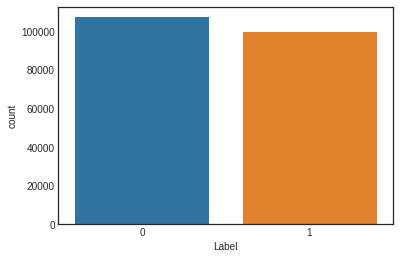

In [0]:
sns.countplot(df['Label'],label="Sum")

plt.show()

In [0]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,44,86.0,59811.0,86.0,0.0,2.965517,15.969799,1460.0,0.0,1359.340909,372.027190,15068.950821,18.365417,55206.416667,195478.316654,1566821.0,167.0,3735347.0,133405.25,341775.688712,1805015.0,167.0,3974862.0,92438.651163,248174.820574,1566821.0,3997.0,0,0,0,0,...,0.0,1460.0,809.418919,728.862428,531240.438541,0,1,0,0,0,0,0,0,1.0,820.506849,2.965517,1359.340909,0,0,0,0,0,0,29,86,44,59811,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,31746.031746,63.000000,0.000000,63.0,63.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,6,86.0,3037.0,86.0,0.0,43.000000,60.811183,1460.0,0.0,506.166667,740.224403,6559.849436,16.803969,68011.142857,110862.707451,232203.0,6.0,134.0,134.00,0.000000,134.0,134.0,476078.0,95215.600000,123467.303580,232601.0,6.0,0,0,0,0,...,0.0,1460.0,347.000000,632.515217,400075.500000,0,1,0,0,0,0,0,0,3.0,390.375000,43.000000,506.166667,0,0,0,0,0,0,2,86,6,3037,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19867.549669,75.500000,98.287843,145.0,6.0,145.0,145.00,0.000000,145.0,145.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,5,73.0,1050.0,73.0,0.0,36.500000,51.618795,1050.0,0.0,210.000000,469.574275,2376.684367,14.814595,78751.166667,118675.492251,232355.0,7.0,179.0,179.00,0.000000,179.0,179.0,472507.0,118126.750000,131726.857333,232875.0,7.0,0,0,0,0,...,0.0,1050.0,140.375000,368.430624,135741.125000,0,1,0,0,0,0,0,0,2.0,160.428571,36.500000,210.000000,0,0,0,0,0,0,2,73,5,1050,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
# all features X = df[['Src Port','Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min']]
X = df[['Src Port','Dst Port','Protocol','Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max','Bwd Pkt Len Min','Bwd Pkt Len Mean','Bwd Pkt Len Std','Flow Byts/s','Flow Pkts/s','Flow IAT Mean','Flow IAT Std','Flow IAT Max','Flow IAT Min','Fwd IAT Tot','Fwd IAT Mean','Fwd IAT Std','Fwd IAT Max','Fwd IAT Min','Bwd IAT Tot','Bwd IAT Mean','Bwd IAT Std','Bwd IAT Max','Bwd IAT Min','Fwd PSH Flags','Bwd PSH Flags','Fwd URG Flags','Bwd URG Flags','Fwd Header Len','Bwd Header Len','Fwd Pkts/s','Bwd Pkts/s','Pkt Len Min','Pkt Len Max','Pkt Len Mean','Pkt Len Std','Pkt Len Var','FIN Flag Cnt','SYN Flag Cnt','RST Flag Cnt','PSH Flag Cnt','ACK Flag Cnt','URG Flag Cnt','CWE Flag Count','ECE Flag Cnt','Down/Up Ratio','Pkt Size Avg','Fwd Seg Size Avg','Bwd Seg Size Avg','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Subflow Fwd Pkts','Subflow Fwd Byts','Subflow Bwd Pkts','Subflow Bwd Byts','Init Fwd Win Byts','Init Bwd Win Byts','Fwd Act Data Pkts','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min']]

y = df['Label']

In [0]:
pd.isnull(X).sum() > 0

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)


In [0]:
LR = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()
LR_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWar

In [0]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [0]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

In [0]:
QDA = QuadraticDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(QDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
QDA_fit_time = scores['fit_time'].mean()
QDA_score_time = scores['score_time'].mean()
QDA_accuracy = scores['test_accuracy'].mean()
QDA_precision = scores['test_precision_macro'].mean()
QDA_recall = scores['test_recall_macro'].mean()
QDA_f1 = scores['test_f1_weighted'].mean()
QDA_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

In [0]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [0]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [0]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [0]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, LDA_fit_time, QDA_fit_time, forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, LDA_score_time, QDA_score_time, forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, LDA_accuracy, QDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, LDA_precision, QDA_precision, forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, LDA_recall, QDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, LDA_f1, QDA_f1, forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, LDA_roc, QDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
4,Random Forest,2.942743,0.062308,0.999511,0.999505,0.999515,0.999511,0.999949
1,Decision Tree,4.791765,0.030049,0.999211,0.999201,0.999220,0.999211,0.999220
3,Quadratic Discriminant Analysis,0.873834,0.093503,0.995318,0.995243,0.995395,0.995318,0.998747
5,K-Nearest Neighbors,1.024252,6.161646,0.990993,0.990931,0.991044,0.990993,0.997103
2,Linear Discriminant Analysis,2.053156,0.032658,0.980934,0.980988,0.981562,0.980940,0.997287
0,Logistic Regression,52.550078,0.033083,0.897402,0.900545,0.895948,0.897088,0.961443
6,Bayes,0.299106,0.050984,0.734888,0.784485,0.741921,0.724656,0.926071


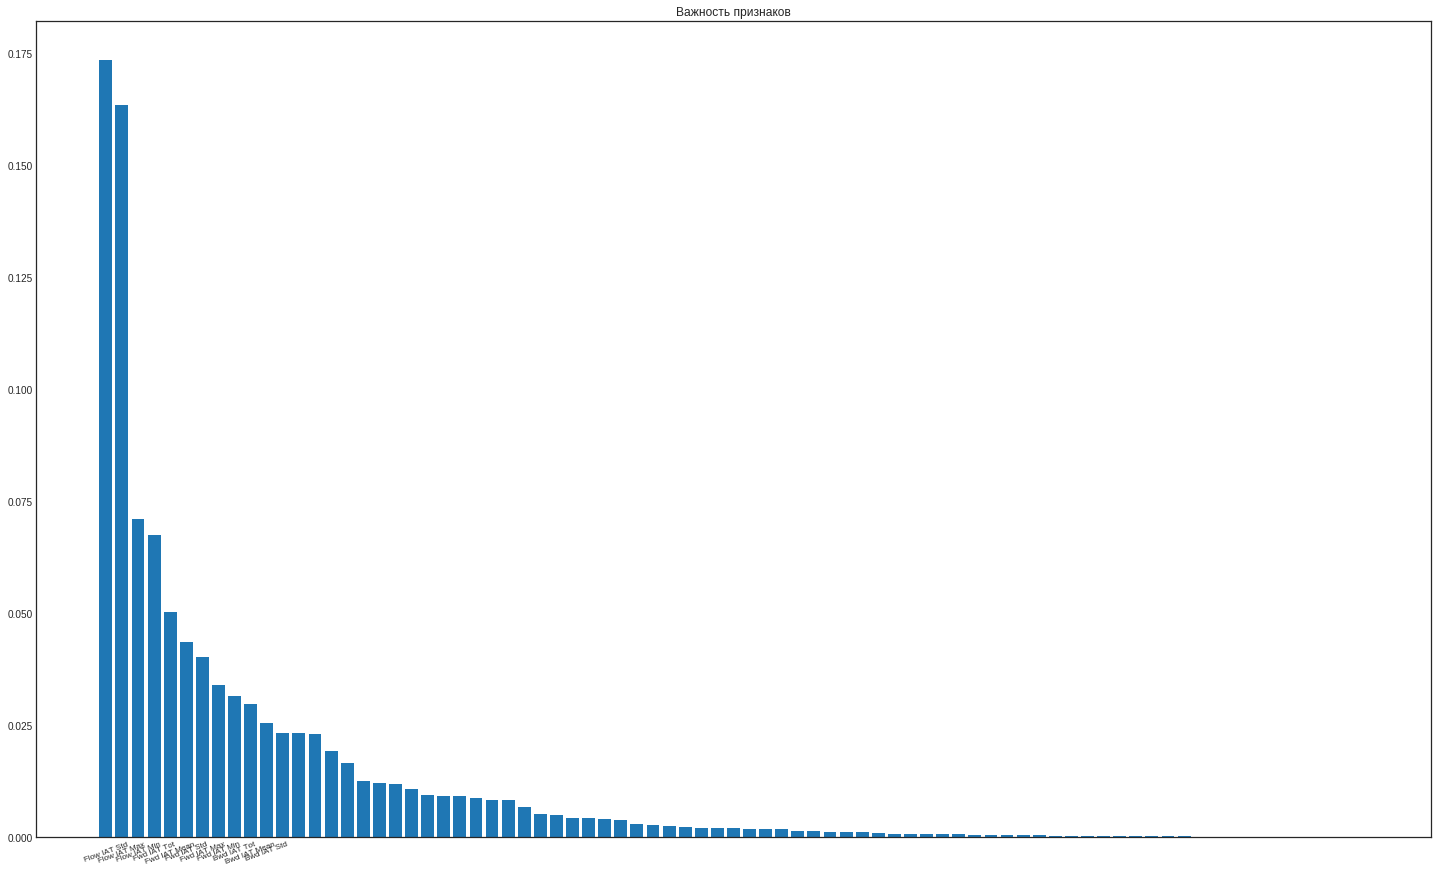

In [0]:
# Train model
model = random_forest.fit(X, y)

# Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names =  df[['Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min','Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std']].columns
# Barplot: Add bars
f, ax = plt.subplots(figsize=(25,15))
plt.bar(range(X.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=20, fontsize = 8)
# Create plot title
plt.title("Важность признаков")
# Show plot
plt.show()

In [0]:
names['Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std']

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [0]:
df.head(5)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow Byts/s,Flow Pkts/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,...,Pkt Len Min,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,URG Flag Cnt,CWE Flag Count,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Fwd Byts/b Avg,Fwd Pkts/b Avg,Fwd Blk Rate Avg,Bwd Byts/b Avg,Bwd Pkts/b Avg,Bwd Blk Rate Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
624,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:32 AM,3974862,29,44,86.0,59811.0,86.0,0.0,2.965517,15.969799,1460.0,0.0,1359.340909,372.027190,15068.950821,18.365417,55206.416667,195478.316654,1566821.0,167.0,3735347.0,133405.25,341775.688712,1805015.0,167.0,3974862.0,92438.651163,248174.820574,1566821.0,3997.0,0,0,0,0,...,0.0,1460.0,809.418919,728.862428,531240.438541,0,1,0,0,0,0,0,0,1.0,820.506849,2.965517,1359.340909,0,0,0,0,0,0,29,86,44,59811,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
625,192.168.4.118-203.73.24.75-4504-80-6,192.168.4.118,4504,203.73.24.75,80,6,12/06/2010 08:34:36 AM,63,1,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,31746.031746,63.000000,0.000000,63.0,63.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,1,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
626,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:36 AM,476078,2,6,86.0,3037.0,86.0,0.0,43.000000,60.811183,1460.0,0.0,506.166667,740.224403,6559.849436,16.803969,68011.142857,110862.707451,232203.0,6.0,134.0,134.00,0.000000,134.0,134.0,476078.0,95215.600000,123467.303580,232601.0,6.0,0,0,0,0,...,0.0,1460.0,347.000000,632.515217,400075.500000,0,1,0,0,0,0,0,0,3.0,390.375000,43.000000,506.166667,0,0,0,0,0,0,2,86,6,3037,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
627,192.168.4.118-203.73.24.75-4505-80-6,192.168.4.118,4505,203.73.24.75,80,6,12/06/2010 08:34:37 AM,151,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,19867.549669,75.500000,98.287843,145.0,6.0,145.0,145.00,0.000000,145.0,145.0,0.0,0.000000,0.000000,0.0,0.0,0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,0.000000,0.000000,0.000000,0,0,0,0,0,0,2,0,1,0,-1,17520,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
628,192.168.4.118-203.73.24.75-4506-80-6,192.168.4.118,4506,203.73.24.75,80,6,12/06/2010 08:34:37 AM,472507,2,5,73.0,1050.0,73.0,0.0,36.500000,51.618795,1050.0,0.0,210.000000,469.574275,2376.684367,14.814595,78751.166667,118675.492251,232355.0,7.0,179.0,179.00,0.000000,179.0,179.0,472507.0,118126.750000,131726.857333,232875.0,7.0,0,0,0,0,...,0.0,1050.0,140.375000,368.430624,135741.125000,0,1,0,0,0,0,0,0,2.0,160.428571,36.500000,210.000000,0,0,0,0,0,0,2,73,5,1050,-1,5840,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [0]:
df.columns

NameError: ignored

In [0]:
!pip install catboost

     |████████████████████████████████| 61.9MB 72.1MB/s 


In [0]:
from catboost import CatBoostRegressor
model_cat = CatBoostRegressor(iterations=200, learning_rate=0.3, depth=4)

In [0]:
model_cat.fit(X_train, y_train)

0:	learn: 0.4874245	total: 71.8ms	remaining: 14.3s
1:	learn: 0.3443056	total: 94.2ms	remaining: 9.32s
2:	learn: 0.2453144	total: 117ms	remaining: 7.66s
3:	learn: 0.1776274	total: 139ms	remaining: 6.82s
4:	learn: 0.1322481	total: 162ms	remaining: 6.3s
5:	learn: 0.1023123	total: 183ms	remaining: 5.93s
6:	learn: 0.0840868	total: 208ms	remaining: 5.73s
7:	learn: 0.0732334	total: 230ms	remaining: 5.53s
8:	learn: 0.0670130	total: 251ms	remaining: 5.32s
9:	learn: 0.0625951	total: 271ms	remaining: 5.15s
10:	learn: 0.0591385	total: 299ms	remaining: 5.13s
11:	learn: 0.0576604	total: 321ms	remaining: 5.03s
12:	learn: 0.0565372	total: 342ms	remaining: 4.92s
13:	learn: 0.0558140	total: 362ms	remaining: 4.8s
14:	learn: 0.0546706	total: 380ms	remaining: 4.68s
15:	learn: 0.0539836	total: 396ms	remaining: 4.55s
16:	learn: 0.0527449	total: 415ms	remaining: 4.46s
17:	learn: 0.0518095	total: 440ms	remaining: 4.44s
18:	learn: 0.0513532	total: 462ms	remaining: 4.4s
19:	learn: 0.0506780	total: 485ms	remainin

In [0]:
preds_model_cat=model_cat.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

score_cat=np.round(np.clip(preds_model_cat, 0,1)).astype('int')
mt_cat = confusion_matrix(y_test.astype('int'), score_cat)
mt_cat

array([[36231,   104],
       [    6, 34181]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype('int'), score_cat)

0.998440203057202

In [0]:
clf = RandomForestClassifier()

In [0]:
clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
preds_model_win=clf.predict(X_test)

In [0]:
score_win=np.round(np.clip(preds_model_win, 0,1)).astype('int')
mt_win = confusion_matrix(y_test.astype('int'), score_win)
mt_win

array([[36316,    19],
       [   17, 34170]])

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test.astype('int'), score_win)

0.9994895210005389

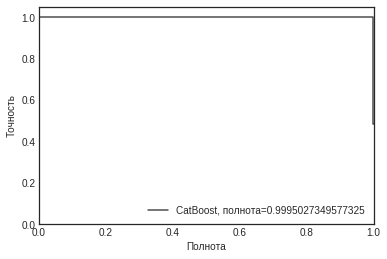

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import average_precision_score
precision, recall, _ = precision_recall_curve(y_test.astype('int'), score_win)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='k', alpha=0.7,
         where='post', linestyle="-",  label="CatBoost, полнота="+str(recall[1]))
#plt.fill_between(recall, precision, alpha=0.1, color='r', **step_kwargs)


plt.xlabel('Полнота')
plt.ylabel('Точность')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
#plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          #average_precision_my))

plt.legend(loc=4)

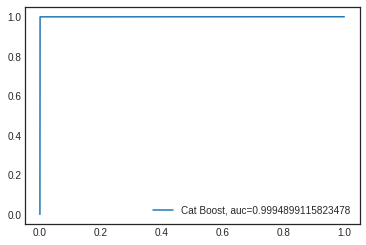

In [0]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'), score_win)
auc = metrics.roc_auc_score(y_test.astype('int'), score_win)
plt.plot(fpr,tpr,label="Cat Boost, auc="+str(auc))


plt.legend(loc=4)
plt.show()